In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [16]:
model = LogisticRegression(solver='liblinear')

In [17]:
model.fit(x,y)

LogisticRegression(solver='liblinear')

In [18]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [19]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

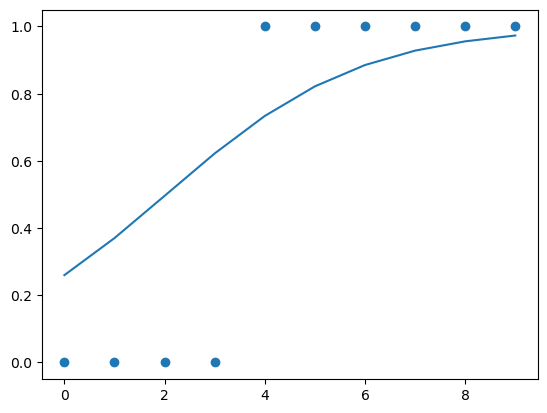

In [20]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
plt.plot(x,prob)

<Axes: >

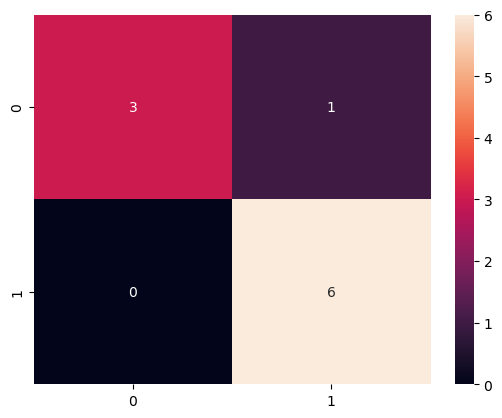

In [22]:
cm = confusion_matrix(y, model.predict(x))
sns.heatmap(cm, annot=True)

In [25]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [27]:
model.score(x,y)

0.9

In [29]:
model2 = LogisticRegression()
model2.fit(x,y)

LogisticRegression()

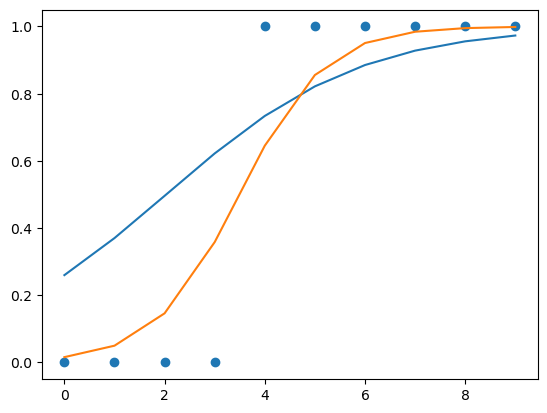

In [30]:
plt.scatter(x,y)
prob = model.predict_proba(x)[:,1]
prob2 = model2.predict_proba(x)[:,1]
plt.plot(x,prob)
plt.plot(x,prob2)

In [31]:
from sklearn import datasets

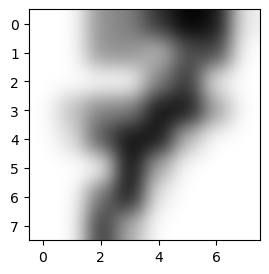

In [36]:
digits = datasets.load_digits()

plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[7], cmap=plt.cm.gray_r, interpolation='gaussian')
plt.show()

In [38]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [39]:
X = digits.data
y = digits.target

In [41]:
X.shape

(1797, 64)

In [42]:
y.shape

(1797,)

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
np.max(X)

16.0

In [47]:
np.min(X)

0.0

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [51]:
X_train.shape

(1257, 64)

In [52]:
X_test.shape

(540, 64)

In [54]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [57]:
model = LogisticRegression(solver='liblinear')

In [58]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [59]:
model.score(X_train, y_train)

0.9976133651551312

In [60]:
model.score(X_test, y_test)

0.9518518518518518

<Axes: >

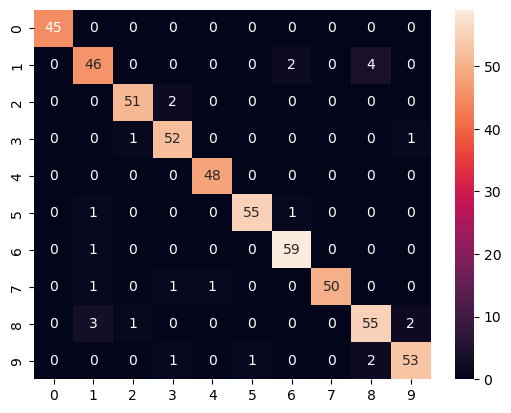

In [61]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [64]:
model = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(solver='liblinear'))
    ]
)

In [65]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(solver='liblinear'))])

In [66]:
model.score(X_test,y_test)

0.9537037037037037

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [68]:
weather = ['Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot', 'Hot','Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool','Mild','Mild','Mild','Hot','Mild']


play = ['No', 'No', 'Yes','Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [73]:
le = LabelEncoder()

X = pd.DataFrame({'weather': weather, 'temp': temp})
y = (np.array(play) == 'Yes').astype(int)

In [74]:
X

,weather,temp
0,Sunny,Hot
1,Sunny,Hot
2,Overcast,Hot
3,Rainy,Mild
4,Rainy,Cool
5,Rainy,Cool
6,Overcast,Cool
7,Sunny,Mild
8,Sunny,Cool
9,Rainy,Mild


In [75]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [81]:
le_w = LabelEncoder().fit(weather)
X['weather']= le_w.transform(weather)
le_t = LabelEncoder().fit(temp)
X['temp']= le_t.transform(temp)

In [83]:
le_w.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype='<U8')

In [88]:
le_t.classes_

array(['Cool', 'Hot', 'Mild'], dtype='<U4')

In [86]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [91]:
model.predict([[0,1]])

/Users/yjhouma/opt/anaconda3/envs/hacktiv8/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [94]:
breast_cancer = datasets.load_breast_cancer()

In [95]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [96]:
X = breast_cancer.data
y = breast_cancer.target

In [98]:
X = pd.DataFrame(X, columns=breast_cancer.feature_names)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [103]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.075829,19.409272,91.581197,649.219014,0.096505,0.103155,0.086472,0.048004,0.181128,0.062731,...,16.256228,25.875657,107.157089,880.471127,0.132799,0.252392,0.270498,0.114445,0.291017,0.083665
std,3.461330,4.312709,23.825336,344.777638,0.013962,0.050654,0.077301,0.037747,0.027059,0.006932,...,4.852259,6.148819,33.690123,580.303734,0.022995,0.151222,0.205108,0.065534,0.061945,0.017097
min,6.981000,10.380000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.702500,16.430000,75.075000,420.350000,0.086560,0.066783,0.029773,0.020323,0.161825,0.057725,...,13.015000,21.392500,84.367500,515.425000,0.117575,0.147825,0.114975,0.065280,0.252225,0.071557
50%,13.390000,18.890000,86.470000,551.750000,0.095825,0.094490,0.060070,0.033455,0.180050,0.061790,...,14.965000,25.555000,97.665000,685.500000,0.132250,0.217300,0.229850,0.101500,0.282650,0.080285
75%,15.690000,21.807500,103.550000,765.375000,0.105300,0.129125,0.122050,0.068575,0.195700,0.066142,...,18.540000,30.142500,125.075000,1048.500000,0.146000,0.334150,0.384700,0.160500,0.319150,0.091817
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.426400,0.191300,0.290600,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000


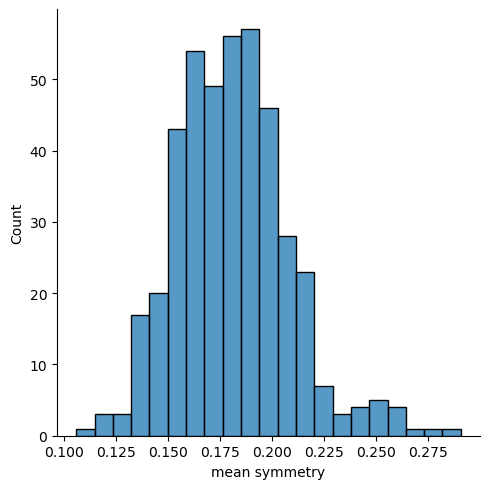

In [106]:
sns.displot(X_train['mean symmetry'])


In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [115]:
scaler = MinMaxScaler().fit(X_train)
scaler2 = StandardScaler().fit(X_train)

In [116]:
scaler.transform(X_train)

array([[0.24066735, 0.14775087, 0.23981553, ..., 0.20762887, 0.22905579,
        0.41166497],
       [0.25877   , 0.67785467, 0.23499406, ..., 0.        , 0.16637098,
        0.10503561],
       [0.49116884, 0.47058824, 0.48221648, ..., 0.6347079 , 0.38734477,
        0.25245846],
       ...,
       [0.24800626, 0.42698962, 0.24428761, ..., 0.37525773, 0.12339838,
        0.32595795],
       [0.23039288, 0.48650519, 0.22765705, ..., 0.44948454, 0.24403706,
        0.37860292],
       [0.71329321, 0.41557093, 0.68625533, ..., 0.76151203, 0.0975754 ,
        0.13657172]])

In [114]:
pd.DataFrame(scaler.transform(X_train), columns=breast_cancer.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.347122,0.312432,0.333947,0.214515,0.336955,0.256964,0.202796,0.250933,0.406977,0.264632,...,0.296202,0.361286,0.282619,0.170879,0.406981,0.247199,0.216052,0.393281,0.265162,0.242671
std,0.169349,0.149229,0.166483,0.146247,0.138389,0.155372,0.181287,0.197320,0.146583,0.146857,...,0.172617,0.165960,0.167788,0.142623,0.151851,0.166067,0.163824,0.225204,0.122108,0.144942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.231004,0.209343,0.218608,0.117434,0.238378,0.145398,0.069823,0.106234,0.302411,0.158581,...,0.180896,0.240283,0.169119,0.081160,0.306445,0.132367,0.091833,0.224330,0.188695,0.140026
50%,0.313567,0.294464,0.298232,0.173171,0.330211,0.230385,0.140877,0.174882,0.401138,0.244703,...,0.250267,0.352632,0.235345,0.122960,0.403355,0.208662,0.183586,0.348797,0.248669,0.214013
75%,0.426097,0.395415,0.417581,0.263786,0.424125,0.336620,0.286234,0.358468,0.485915,0.336917,...,0.377446,0.476451,0.371856,0.212176,0.494156,0.336983,0.307268,0.551546,0.320619,0.311779
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
pd.DataFrame(scaler2.transform(X_train), columns=breast_cancer.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-4.094794e-15,-4.169852e-16,1.630412e-15,-1.096671e-15,7.693376e-15,-1.334353e-15,8.339703e-18,-8.923483e-16,-4.420043e-15,1.161721e-14,...,-6.796858e-16,1.701300e-15,-1.784697e-15,1.959830e-16,6.871916e-15,-1.667941e-16,-9.090277e-16,1.200917e-15,7.672527e-16,-2.401835e-15
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.052151e+00,-2.096104e+00,-2.008257e+00,-1.468522e+00,-2.437701e+00,-1.655804e+00,-1.119958e+00,-1.273201e+00,-2.779691e+00,-1.804085e+00,...,-1.717966e+00,-2.179507e+00,-1.686364e+00,-1.199525e+00,-2.683282e+00,-1.490304e+00,-1.320358e+00,-1.748386e+00,-2.174094e+00,-1.676224e+00
25%,-6.864758e-01,-6.916245e-01,-6.936148e-01,-6.645968e-01,-7.131538e-01,-7.189027e-01,-7.343546e-01,-7.341859e-01,-7.141975e-01,-7.229889e-01,...,-6.687686e-01,-7.299659e-01,-6.772425e-01,-6.298001e-01,-6.628470e-01,-6.922935e-01,-7.591396e-01,-7.510966e-01,-6.269639e-01,-7.090059e-01
50%,-1.983732e-01,-1.205467e-01,-2.147800e-01,-2.830335e-01,-4.879088e-02,-1.712691e-01,-3.419518e-01,-3.858715e-01,-3.988295e-02,-1.358605e-01,...,-2.664214e-01,-5.221072e-02,-2.820782e-01,-3.363762e-01,-2.390975e-02,-2.323290e-01,-1.984096e-01,-1.977600e-01,-1.352278e-01,-1.979480e-01
75%,4.668926e-01,5.567376e-01,5.029468e-01,3.372973e-01,6.306305e-01,5.132853e-01,4.607919e-01,5.456194e-01,5.391581e-01,4.927930e-01,...,4.712150e-01,6.947447e-01,5.324699e-01,2.898938e-01,5.747537e-01,5.412852e-01,5.574471e-01,7.035890e-01,4.546938e-01,4.773627e-01
max,3.859748e+00,4.612899e+00,4.005437e+00,5.377258e+00,4.796792e+00,4.787920e+00,4.402629e+00,3.800665e+00,4.050404e+00,5.013248e+00,...,4.082023e+00,3.853124e+00,4.280550e+00,5.820220e+00,3.909854e+00,4.538457e+00,4.790928e+00,2.697251e+00,6.025008e+00,5.231182e+00


In [118]:
model = Pipeline(
    steps=[
        ('minmaxscaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [119]:
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier())])

In [121]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.98      0.98      0.98        87

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [122]:
model2 = Pipeline(
    steps=[
        ('minmaxscaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.96      0.99      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [123]:
from sklearn.metrics import log_loss

model_performance = []
for k in range(2,11):
    model = Pipeline(
    steps=[
            ('minmaxscaler', MinMaxScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ]
    )
    model.fit(X_train, y_train)
    ll = log_loss(y_test, model.predict_proba(X_test))
    model_performance.append(ll)
    
    
    


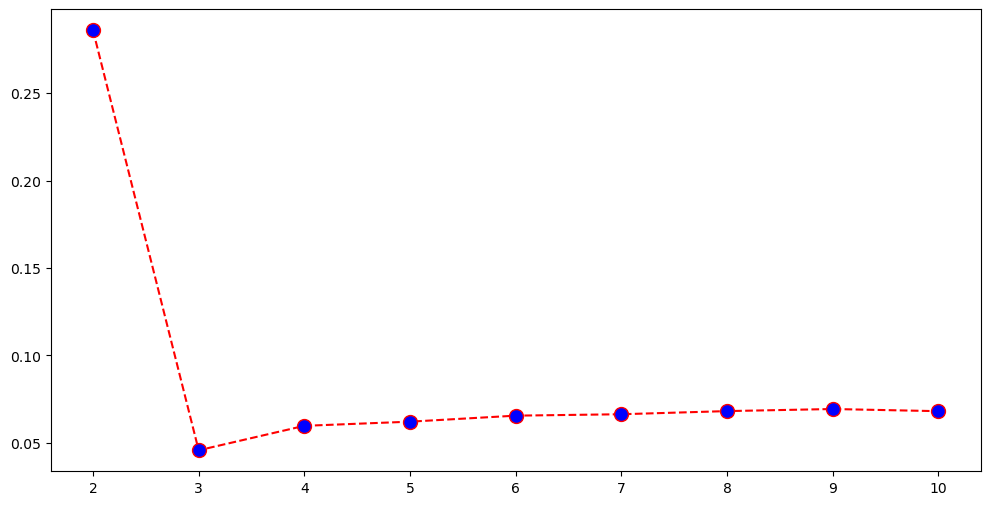

In [125]:
plt.figure(figsize=(12,6))
plt.plot(range(2,11), model_performance, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)

In [126]:
from sklearn.metrics import recall_score

model_performance = []
for k in range(2,11):
    model = Pipeline(
    steps=[
            ('minmaxscaler', MinMaxScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=k))
        ]
    )
    model.fit(X_train, y_train)
    rs = recall_score(y_test, model.predict(X_test))
    model_performance.append(rs)
    
    
    


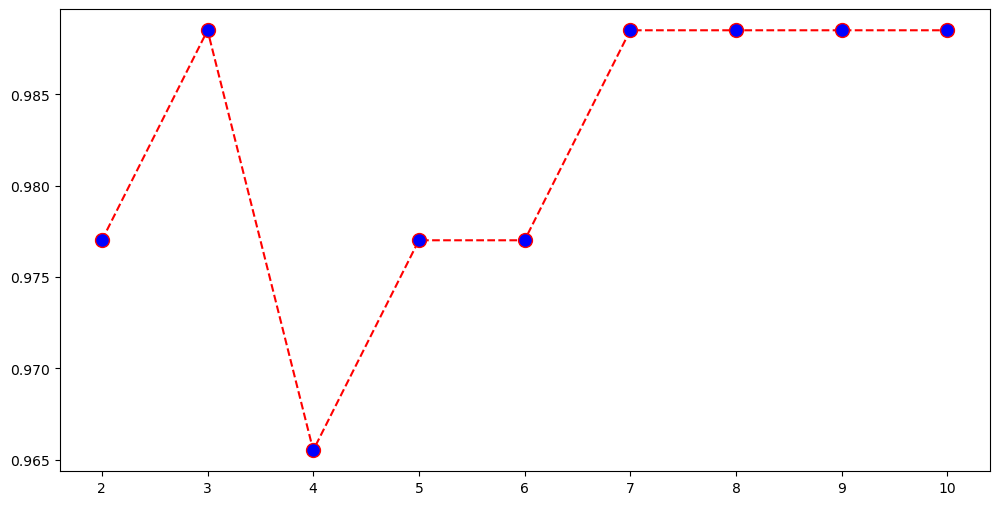

In [128]:
plt.figure(figsize=(12,6))
plt.plot(range(2,11), model_performance, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)